# Chapter 3 - Making Decisions with Linear Equations
## Estimating the amount paid to the taxi driver



In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [8]:
data = {'Kilometres': '1 2 3 4 5'.split(), 'Meter': '7.5 10.0 12.5 15.0 17.5'.split(), 'Paid (incl. tips)': '8 10 14 15 20'.split()}

df_taxi = pd.DataFrame(data)
df_taxi

,Kilometres,Meter,Paid (incl. tips)
0,1,7.5,8
1,2,10.0,10
2,3,12.5,14
3,4,15.0,15
4,5,17.5,20


In [9]:
# Initialize and train the model
reg = LinearRegression()
reg.fit(df_taxi[['Kilometres']], df_taxi['Paid (incl. tips)'])

# Make predictions
df_taxi['Paid (Predicted)'] = reg.predict(df_taxi[['Kilometres']])

We only have one feature this time: Kilometres 

The fit() and predict() methods expect a two-dimensional ax , which is why we enclosed Kilometers in an extra set of square brackets— `df_taxi[['Kilometres']]` .

We put our predictions in the same DataFrame under Paid (Predicted). We can then plot the actual values versus the estimated ones using the following
code:

In [2]:
import matplotlib.pyplot as plt

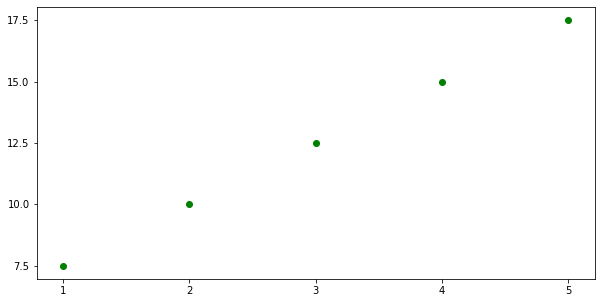

In [46]:
fig = plt.subplots(figsize=(10, 5))

X = df_taxi.index
y = df_taxi['Meter']
plt.scatter(x=X, y=y, color='g')
#plt.plot(X, reg.predict(X), color='k')


________________________________________________________________

# Predicting house prices in Boston


The Boston dataset is a small set representing the house prices in the city of Boston. It
contains:
- 506 samples
- 13 features

Let's load the data into a DataFrame, as follows:

In [3]:
from sklearn.datasets import load_boston

In [5]:
# initializing the dataset
boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)

df_boston['TARGET'] = boston.target
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Data exploration

It's important to make sure you do not have any null values in your data; 

otherwise, scikit-learn will complain about it. 

Here, I will count the sum of the null values in each column,
then take the sum of it. If I get 0, great:

In [14]:
df_boston.isnull().sum().sum()

0

For a regression problem, the most important thing to do is:
- to understand the distribution of your target!! 

If a target ranges between 1 and 10 , and after training our model we get amean absolute error of 5 , we can tell that the error is large in this context.

However, the same error for a target that ranges between 500,000 and 1,000,000 is negligible. 

Histograms are your friend when you want to visualize distributions. Inaddition to the target's distribution, let's also plot the mean values for each feature:

/home/anandaheino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


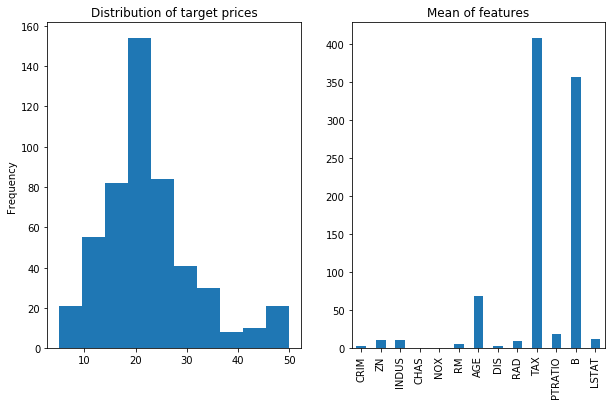

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

df_boston['TARGET'].plot(title='Distribution of target prices', kind='hist', ax=axs[0])

df_boston[boston.feature_names].mean().plot(title='Mean of features', kind='bar', ax=axs[1])

fig.show()

In the preceding graph, it is observed that:
- The prices range between 5 and 50
- Obviously, these are not real prices, probably normalized values
- We can tell from the histogram that most of the prices are below 35 

## We can use the following code snippet to see that 90% of the prices are below `34.8` :



In [10]:
df_boston['TARGET'].describe(percentiles=[.9, .95, .99])

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
50%       21.200000
90%       34.800000
95%       43.400000
99%       50.000000
max       50.000000
Name: TARGET, dtype: float64

## Splitting the data

When it comes to small datasets, it's advised that you allocate enough data for testing. 

So, we will split our data into 60% for training and 40% for testing using the train_test_split function:

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_train, df_test = train_test_split(df_boston, test_size = 0.4, random_state = 14)

In [13]:
x_train = df_train[boston.feature_names]
x_test = df_test[boston.feature_names]
y_train = df_train['TARGET']
y_test = df_test['TARGET']

## Calculating a baseline

- The distribution of the target gave us an idea of what level of error we can tolerate.
- If we were in the real estate business and human agents were used to estimate house prices, then we would most likely be expected to build a model that can do better than the human agents.

#### Nevertheless, since we do not know any real estimations to compare our model to, we can come up with our own baseline instead.
- The mean house price is 22.5 . 
- If we build a dummy model that returns the mean price regardless of the data given to it, then it would make a reasonable baseline.
- Keep in mind that the value of 22.5 is calculated for the entire dataset, but since we are pretending to only have access to the training data, then it makes sense to calculate the mean price for the training set only. 
- To save us all this effort, scikit-learn has dummy regressors available that do all this work for us.

### Here, we will create a dummy regressor and use it to calculate baseline predictions for the test set:

In [67]:
from sklearn.dummy import DummyRegressor

baseline = DummyRegressor(strategy='mean')
baseline.fit(x_train, y_train)

y_test_baseline = baseline.predict(x_test)

## OBS: 
- There are other strategies that we can use, such as finding the median (the 50 th quantile) or any other N th quantile. 
- Keep in mind that for the same data, using the mean as an estimation gives a lower MSE compared to when the median is used. 
- Conversely, the median gives a lower Mean Absolute Error (MAE).
- We want our model to beat the baseline for both the MAE and MSE.

# Training the Linear Regressor

In [68]:
reg = LinearRegression()
reg.fit(x_train, y_train)

y_test_pred = reg.predict(x_test)

# Evaluating our model's accuracy

There are three commonly used metrics for regression: R² , MAE, and MSE. Let's first write
the code that calculates the three metrics and prints the results:

In [69]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print('R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(r2_score(y_test, y_test_pred), r2_score(y_test, y_test_baseline)))

print('MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_test, y_test_baseline)))

print('MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(mean_squared_error(y_test, y_test_pred), mean_squared_error(y_test, y_test_baseline)))


R2 Regressor = 0.70 vs Baseline = -0.01
MAE Regressor = 3.43 vs Baseline = 6.64
MSE Regressor = 24.12 vs Baseline = 82.47


### MSE is more sensitive to outliers than MAE. 
- That's why the mean estimations for the baseline scored badly there.
- Obviously, in the baseline model, we already used the target's mean as the prediction. That's why its R² score is 0 .
- For MAE and MSE, the smaller their values, the better the model is.
- Conversely, for R 2 , the higher its values, the better the model is.

## Good thing: 
the model scored better than the dummy baseline in all the three scores!

# Showing feature coefficients

We know that a linear model multiplies each of the features by a certain coefficient, and then gets the sum of these products as its final prediction. We can use the regressor's `coef_`
method after the model is trained to print these coefficients:

In [70]:
df_feature_importance = pd.DataFrame({'Features': x_train.columns,
                                      'Coeff': reg.coef_,
                                      'ABS(Coeff)': abs(reg.coef_)}).set_index('Features').sort_values('Coeff', ascending=False)

In [71]:
df_feature_importance

,Coeff,ABS(Coeff)
Features,,
RM,3.861760,3.861760
CHAS,1.655302,1.655302
RAD,0.353022,0.353022
INDUS,0.053782,0.053782
ZN,0.052559,0.052559
AGE,0.016805,0.016805
B,0.006526,0.006526
TAX,-0.016255,0.016255
CRIM,-0.097264,0.097264


As we can see in these results, some coefficients are positive and others are negative. 
- A positive coefficient means that the feature correlates positively with the target and vice versa. 
- I also added another column for the absolute values of the coefficients { ABS ( coefff ) }